# Process EDA

In [20]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [21]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

In [22]:
# Calculate mean tonic eda for each quartile and each subject for sessions 1-5b

quartile_means = {}

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']

# Loop through sessions
for session_file, session_name in zip(sessions, session_names):
    quartile_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                # Divide the data into quarters and calculate means
                df_session['quarter'] = pd.qcut(df_session.index, 4, labels=[1, 2, 3, 4])
                means_session = df_session.groupby('quarter')['EDA_Clean'].mean().to_list()
                quartile_means[session_name].append([sub_dir] + means_session)

    columns = ['subject', 'Q1', 'Q2', 'Q3', 'Q4']
    quartile_means[session_name] = pd.DataFrame(quartile_means[session_name], columns=columns)

# Display one df
print(quartile_means['session1'])

  subject        Q1        Q2        Q3        Q4
0   sub-6  5.773613  6.072895  5.701529  5.287308
1   sub-1  5.325193  5.275383  5.060610  5.168176
2   sub-8  0.019280  0.020331  0.020121  0.024155
3   sub-9  0.073778  0.080399  0.083207  0.085784
4   sub-7  0.294252  0.323176  0.310502  0.278201
5  sub-10  0.057695  0.059478  0.060325  0.062368
6  sub-11  0.148730  0.169061  0.196198  0.203515
7   sub-2  1.062834  1.179393  1.236667  1.271369
8   sub-4  0.039383  0.041874  0.044198  0.046667
9   sub-3  3.127855  2.882452  2.585449  2.378622


In [26]:
# Calculate mean tonic eda for each subject for sessions 1-5b

session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_eda = df_session['EDA_Phasic'].mean()
                session_means[session_name].append([sub_dir, mean_eda])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_eda'])

# Display one df
print(session_means['session1'])

  subject      mean_eda
0   sub-6 -7.387001e-04
1   sub-1  4.300502e-04
2   sub-8 -2.504515e-06
3   sub-9  3.525547e-07
4   sub-7 -2.136331e-06
5  sub-10 -4.192999e-06
6  sub-11  1.814235e-05
7   sub-2  3.175695e-05
8   sub-4 -9.894310e-07
9   sub-3 -1.141931e-04


NameError: name 'pivoted_sums' is not defined

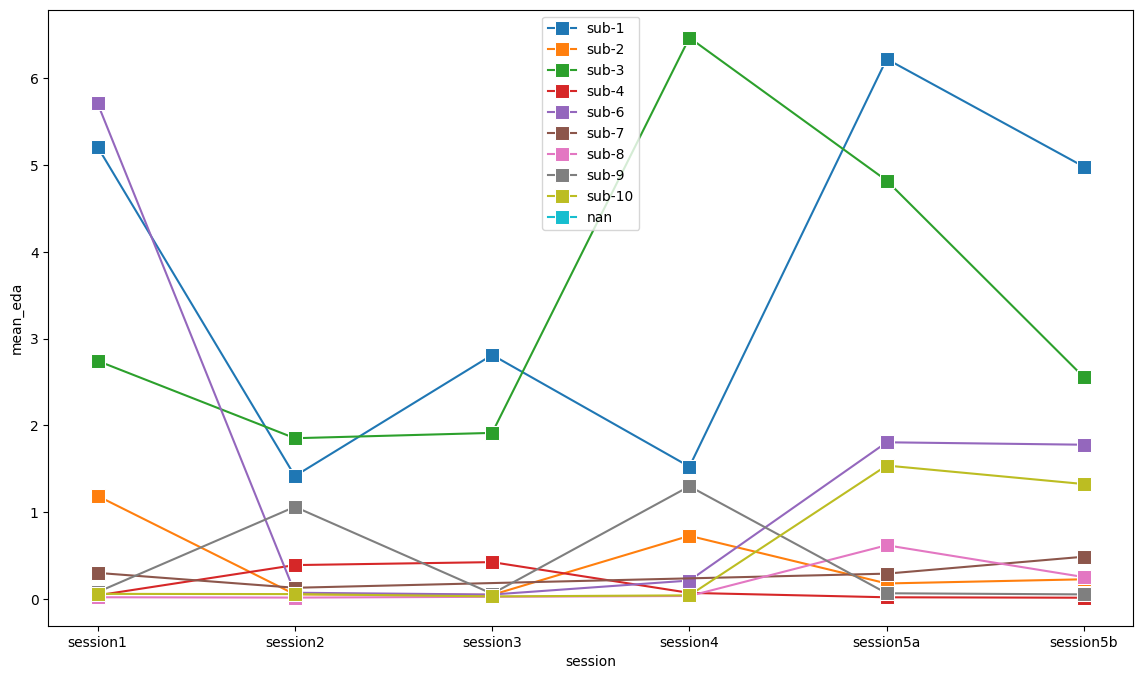

<Figure size 1200x600 with 0 Axes>

In [24]:
# Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_eda'].fillna(df_all_sessions['mean_eda'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


plt.figure(figsize=(14, 8))

labels = ['Session 1 \n Apartment A', 
          'Session 2\n Apartment B', 
          'Session 3\n Apartment C', 
          'Session 4\n Apartment C', 
          'Session 5\n Apartment A \n (Distant Condition)',
          'Session 5\n Apartment B \n (Near Condition)']

for subject in df_all_sessions['subject'].unique():
    df_subject = df_all_sessions[df_all_sessions['subject'] == subject]
    sns.lineplot(data=df_subject, x='session', y='mean_eda', marker='s', markersize=10, label=subject)
    import matplotlib.pyplot as plt

# ... rest of your code (assuming pivoted_sums is defined)

# Create the line plot
plt.figure(figsize=(12, 6))
pivoted_sums.T.plot(kind='line')

# Customize the plot
plt.title('Sum of SCR Amplitude by Subject and Session')
plt.xlabel('Session')
plt.ylabel('Sum of SCR Amplitude')
plt.legend(title='Subject')
plt.grid(True)
plt.show()

plt.title(None)
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean EDA \n', fontsize = 14)
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/all-participant-session-means.png", dpi=300)

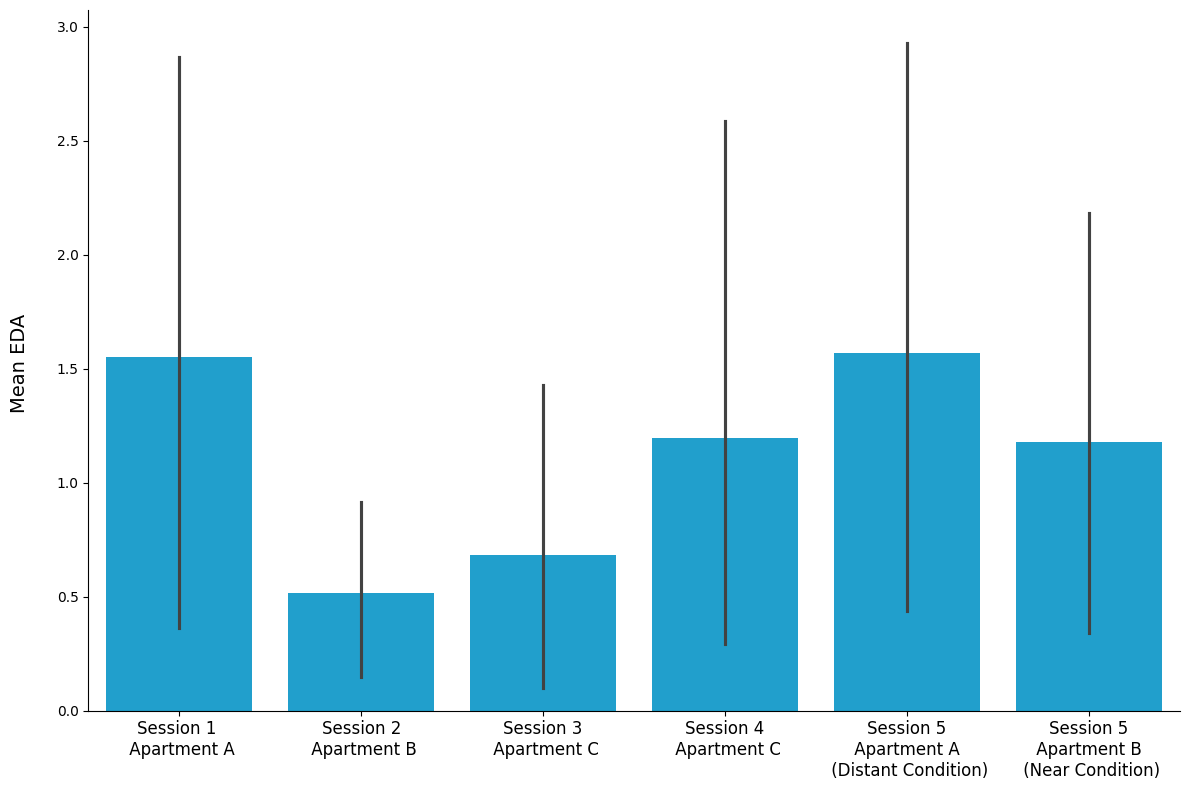

In [12]:
# Plot each mean tonic EDA across subjects for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_eda', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean EDA \n', fontsize = 14)
plt.tight_layout()
sns.despine()


if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

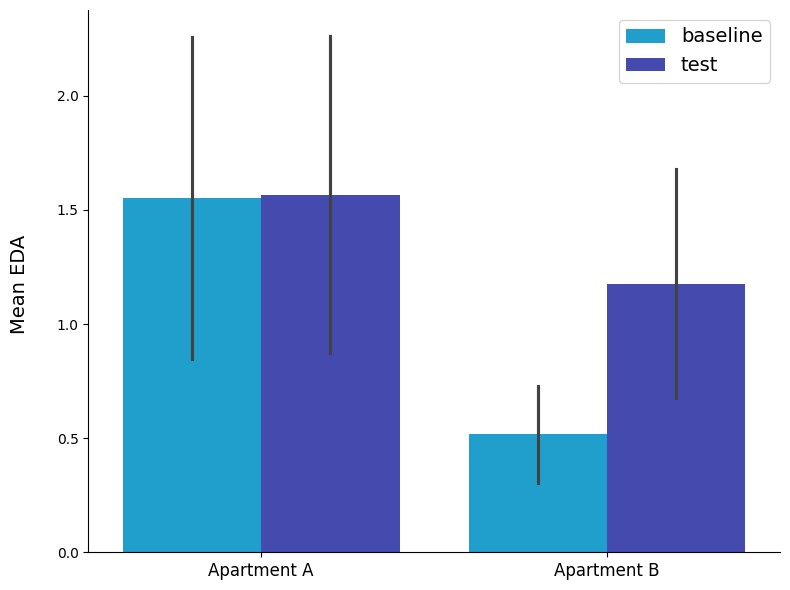

In [13]:
# Plot baseline & test mean tonic EDA across subjects for Apartment A and Apartment B 
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

filtered_df = df_all_sessions[df_all_sessions['session'].isin(
    ['session1', 'session2', 'session5a', 'session5b'])].reset_index(drop=True)

filtered_df['group'] = filtered_df['session'].map({
    'session1': 'baseline',
    'session2': 'baseline',
    'session5a': 'test',
    'session5b': 'test'})

filtered_df['apartment'] = filtered_df['session'].map({
    'session1': 'Apartment A',
    'session2': 'Apartment B',
    'session5a': 'Apartment A',
    'session5b': 'Apartment B'})

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='apartment', y='mean_eda', hue='group', errorbar='se', palette=['#05ace8', '#343bbf'])
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('Mean EDA \n', fontsize = 14)
plt.legend(title=None, fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/baseline-vs-test.png", dpi=300)

In [14]:
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_sums = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Onsets'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

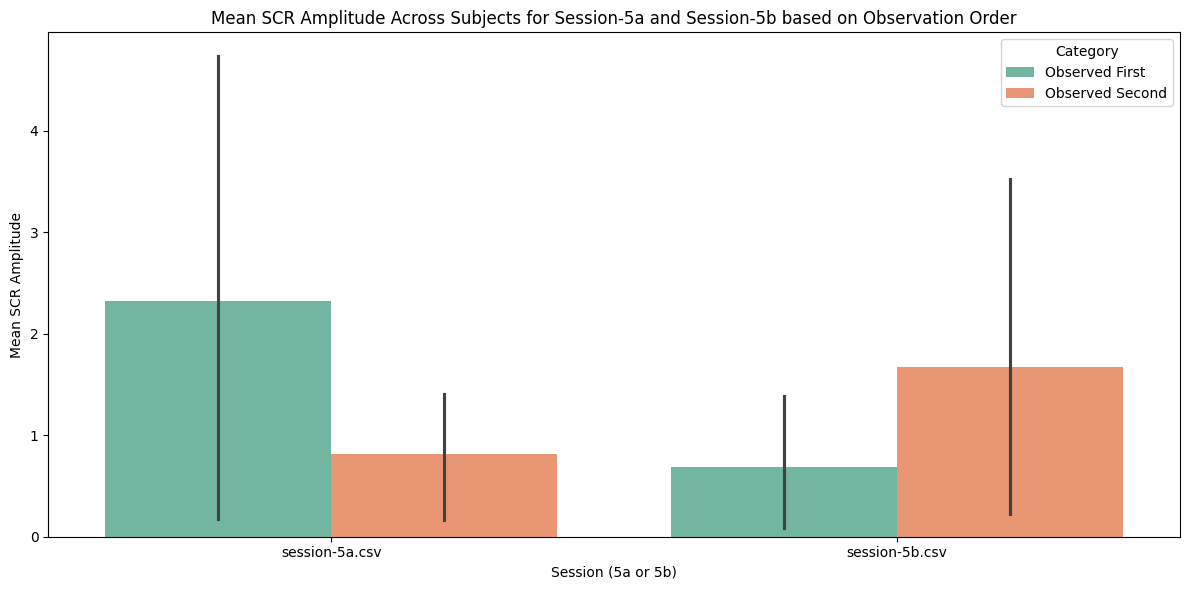

In [17]:

sessions = ['session-5a.csv', 'session-5b.csv']  # Specify the sessions you want to compare
folder_names = [f'sub-{i}' for i in range(1, 12)]  # Adjusted to cover sub-1 to sub-11

# Define apartment categories based on subject folders
apartment_categories = {
    'session-5a.csv': {
        'sub-1': 'Observed First',
        'sub-2': 'Observed First',
        'sub-3': 'Observed First',
        'sub-4': 'Observed Second',
        'sub-5': 'Observed First',
        'sub-6': 'Observed Second',
        'sub-7': 'Observed First',
        'sub-8': 'Observed Second',
        'sub-9': 'Observed Second',
        'sub-10': 'Observed Second',
        'sub-11': 'Observed First',
    },
    'session-5b.csv': {
        'sub-1': 'Observed Second',
        'sub-2': 'Observed Second',
        'sub-3': 'Observed Second',
        'sub-4': 'Observed First',
        'sub-5': 'Observed Second',
        'sub-6': 'Observed First',
        'sub-7': 'Observed Second',
        'sub-8': 'Observed First',
        'sub-9': 'Observed First',
        'sub-10': 'Observed First',
        'sub-11': 'Observed Second',
    }
}

# Initialize dictionary to store mean SCR Amplitude for each session and subject
session_means = {session: {} for session in sessions}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        for session in sessions:
            session_path = os.path.join(sub_path, session)
            if os.path.exists(session_path):
                try:
                    df_session = pd.read_csv(session_path)
                    mean_SCR_Amp = df_session['EDA_Clean'].mean()
                    session_means[session][sub_dir] = mean_SCR_Amp
                except Exception as e:  # Handle potential errors
                    print(f"Error processing file {session_path}: {e}")

# Create a DataFrame for plotting
data_to_plot = []
for session in sessions:
    for subject, mean_value in session_means[session].items():
        data_to_plot.append({
            'Subject': subject,
            'Mean_SCR_Amp': mean_value,
            'Session': session,
            'Category': apartment_categories[session][subject]
        })

df_data = pd.DataFrame(data_to_plot)

# Create the grouped bar graph with session on the x-axis and category (observed first/second) as hue
plt.figure(figsize=(12, 6))
sns.barplot(data=df_data, x='Session', y='Mean_SCR_Amp', hue='Category', palette='Set2')

# Set labels and title
plt.xlabel('Session (5a or 5b)')
plt.ylabel('Mean SCR Amplitude')
plt.title('Mean SCR Amplitude Across Subjects for Session-5a and Session-5b based on Observation Order')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Sessions_Categories.png", dpi=300, bbox_inches='tight')
else:
    plt.show()


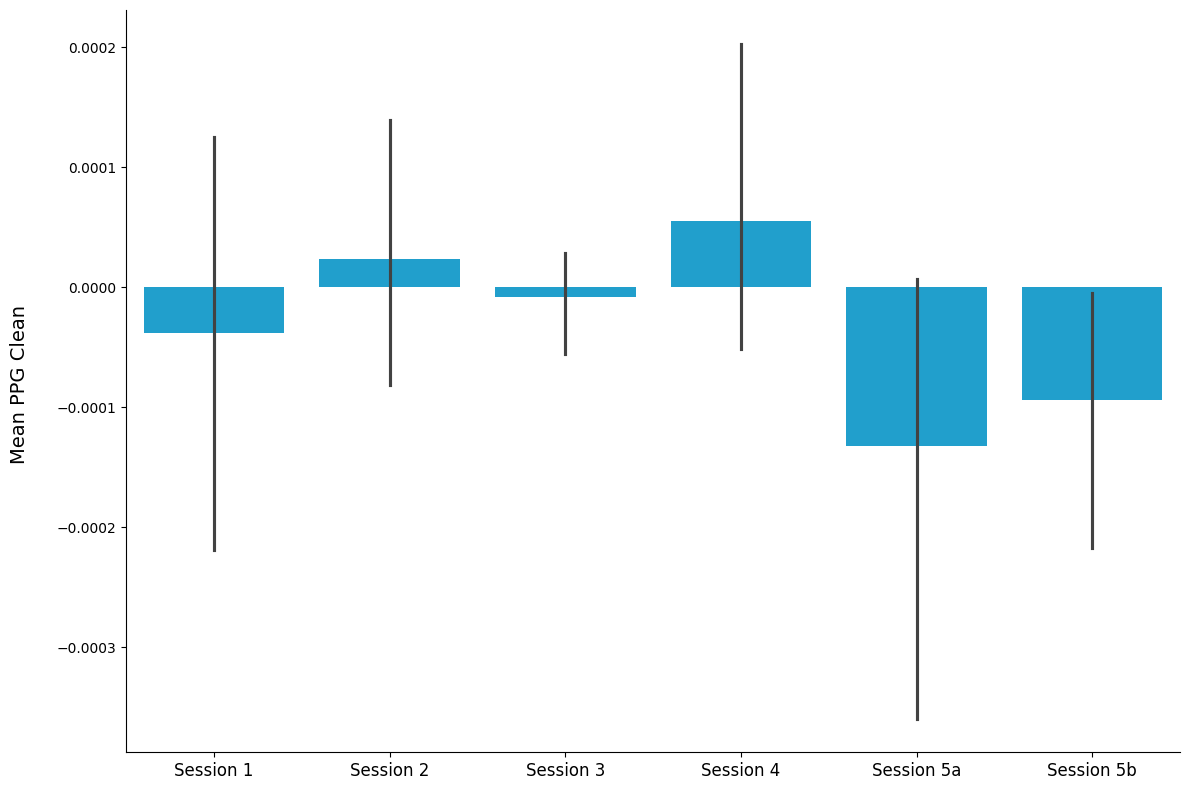

In [4]:


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                mean_hr = df_session['EDA_Phasic'].mean()
                session_means[session_name].append([sub_dir, mean_hr])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_hr'])

    # Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

sns.barplot(data=df_all_sessions, x='session', y='mean_hr', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean PPG Clean \n', fontsize = 14)
plt.tight_layout()
sns.despine()


# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)
    
